In [1]:
#You are hired by NASA as a Data Scientist, Congratulations!
#your first project;  you have to classify stars based on their astornomical measurements,  0 non-pulsar, 1-pulsar
#luckily astronouts gave  you a dataset after making observations through our Galaxy
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours
#which ML model gives the best?
# Because you are working in NASA, they have very clean dataset(there is no preprocessing!)
#to learn more about pulsars
#you will find your dataset inside the rar file named as "pulsar_stars.csv"
#  https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html



# YOU HAVE ANOTHER VARIATION 
#You are hired by IBM Watson as a Data Scientist, Congratulations!
#Your first project;  you have to classify heart disesae  based on their medical measurements,  0 healthy, 1-heart disease
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours (bonus if you use a Neural Network)
#which ML model gives the best?
# Because you are working in IBM Watson, they have very clean dataset(there is no preprocessing!)

#to learn more about the Heart Disease Dataset :
#  https://archive.ics.uci.edu/ml/datasets/Heart+Disease


In [2]:
# YOU can CHOOSE use pulsar stars dataset  or  Heart Disease Classification Dataset
#solving 1 out of 2 is enough
# in both cases your task is Binary classification
# please  once again!  Send me everything in 1 file !

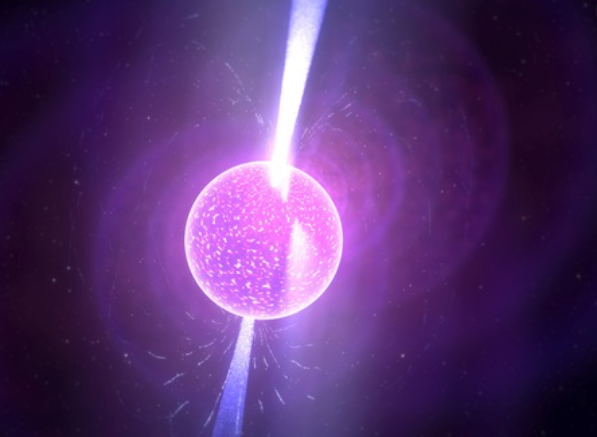

In [3]:
from IPython.display import Image
Image(filename='pulsarstar.png') 

In [4]:
#Loading libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # library for visualization
from matplotlib import pyplot
import seaborn as sns # library for visualization
sns.set() # this command sets the seaborn chart style as the default
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from numpy import round
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [5]:
# Loading dataset
df_stars_train = pd.read_csv("pulsar_stars.csv")
df_stars_train

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [6]:
df_stars_train.info()
df_stars_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
df1 = df_stars_train.drop(columns=["target_class"], axis = 1)

In [8]:
df2 = df_stars_train["target_class"]

In [9]:
df_SCALE1 = preprocessing.scale(df1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_SCALE1, df2, test_size = 0.2, random_state = 1)

AUC-ROC, RFR (oob) =  0.9683646258187444
AUC-ROC, RFR (test) =  0.9781180624306243
Confusion_matrix for RandomForestRegressor:


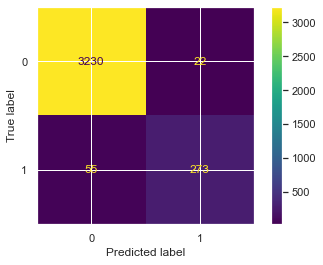

Classification_report for RandomForestRegressor:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.83      0.88       328

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [11]:
# Use RandomForestRegressor model
model_RFR =  RandomForestRegressor(n_estimators=20, max_depth=10, oob_score=True, random_state=1)
model_RFR.fit(X_train, y_train.values.ravel())
a = model_RFR.predict(X_test)
print ("AUC-ROC, RFR (oob) = ", roc_auc_score(y_train, model_RFR.oob_prediction_))
print ("AUC-ROC, RFR (test) = ", roc_auc_score(y_test, a))
a1 = ( a > 0.5 ).astype(int)
print("Confusion_matrix for RandomForestRegressor:")
ConfusionMatrixDisplay.from_predictions(y_test, a1)
plt.show()
print("Classification_report for RandomForestRegressor:", 
      classification_report(y_test, a1), sep="\n")


Evaluation cross validation RandomForestClassifier: 0.979745
AUC-ROC, RFC (oob) =  0.9732176425332671
AUC-ROC, RFC (test) =  0.9175029250292502 Don't understand why only 0.9175!!!
Confusion_matrix for RandomForestClassifier:


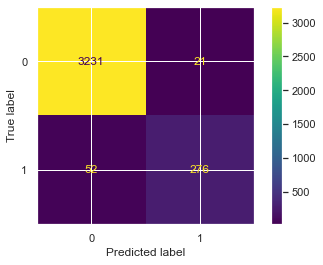

Classification_report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.84      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [12]:
# Use RandomForestClassifier model
model_RFC = RandomForestClassifier(n_estimators=50, max_depth=10, oob_score=True, random_state=1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_RFC = cross_val_score(model_RFC, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation RandomForestClassifier", cv_results_RFC.mean()))
model_RFC.fit(X_train, y_train.values.ravel())
b = model_RFC.predict(X_test)
print ("AUC-ROC, RFC (oob) = ", roc_auc_score(y_train, model_RFC.oob_decision_function_[:,1]))
print ("AUC-ROC, RFC (test) = ", roc_auc_score(y_test, b), "Don't understand why only 0.9175!!!")
print("Confusion_matrix for RandomForestClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test, b)
plt.show()
print("Classification_report for RandomForestClassifier:", 
      classification_report(y_test, b), sep="\n")

Accuracy_XGBR:  0.9787709497206704
Confusion_matrix for XGBRegressor:


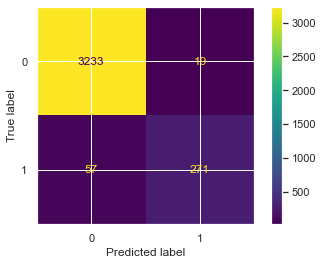

Classification_report for XGBRegressor:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.83      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



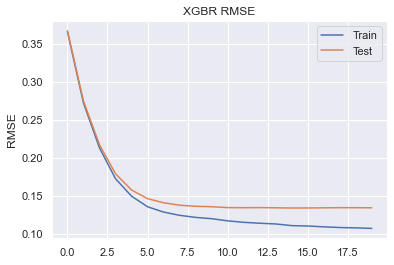

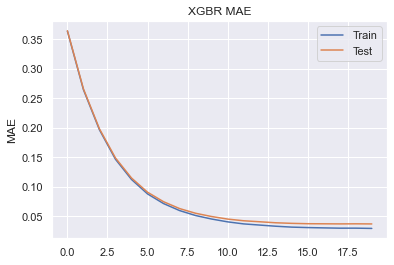

In [13]:
# Use XGBRegressor model
modelXGBR = XGBRegressor(n_estimators=20, subsample=0.9, colsample_bynode=0.2)
eval_XGBR_set = [(X_train, y_train), (X_test, y_test)]
modelXGBR.fit(X_train, y_train, eval_set = eval_XGBR_set, eval_metric=['rmse', 'mae'], verbose = False)
y_predXGBR = modelXGBR.predict(X_test)
pred_XGBR = [round(value) for value in y_predXGBR]
accuracy_XGBR = accuracy_score(y_test, pred_XGBR)
print("Accuracy_XGBR: ", accuracy_XGBR)
a2 = ( y_predXGBR > 0.5 ).astype(int)
print("Confusion_matrix for XGBRegressor:")
ConfusionMatrixDisplay.from_predictions(y_test, pred_XGBR)
plt.show()
print("Classification_report for XGBRegressor:", 
      classification_report(y_test, a2), sep="\n")
results_XGBR = modelXGBR.evals_result()
epochs_XGBR = len(results_XGBR['validation_0']['rmse'])
x_axis = range(0, epochs_XGBR)
# plot root-mean-square error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results_XGBR['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results_XGBR['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBR RMSE')
pyplot.show()
# plot mean absolute error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results_XGBR['validation_0']['mae'], label='Train')
ax.plot(x_axis, results_XGBR['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('MAE')
pyplot.title('XGBR MAE')
pyplot.show()

Evaluation cross validation XGBClassifier: 0.978837
Accuracy_XGBC:  0.9798882681564246
Confusion_matrix for XGBClassifier:


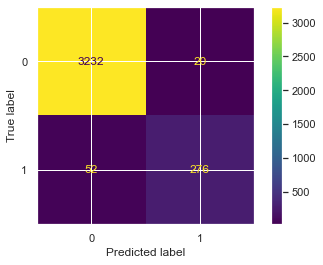

Classification_report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.84      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



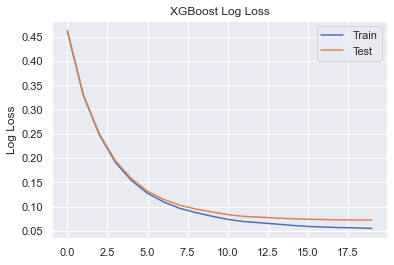

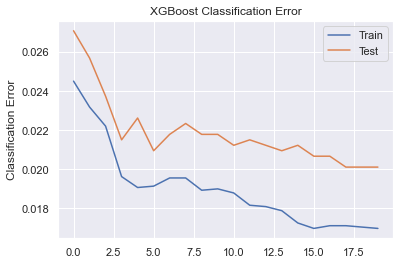

In [14]:
# Use XGBClassifier model
modelXGBC = XGBClassifier(n_estimators=20, subsample=0.9, colsample_bynode=0.2, 
                            use_label_encoder=False, eval_metric = "logloss")
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_XGBC = cross_val_score(modelXGBC, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation XGBClassifier", cv_results_XGBC.mean()))
eval_set = [(X_train, y_train), (X_test, y_test)]
modelXGBC.fit(X_train, y_train, eval_set=eval_set, eval_metric=["error", "logloss"], verbose=False)
y_predXGBC = modelXGBC.predict(X_test)
accuracy_XGBC = accuracy_score(y_test, y_predXGBC)
print("Accuracy_XGBC: ", accuracy_XGBC)
print("Confusion_matrix for XGBClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test, y_predXGBC)
plt.show()
print("Classification_report for XGBClassifier:", 
      classification_report(y_test, y_predXGBC), sep="\n")
results_XGBC = modelXGBC.evals_result()
epochs_XGBC = len(results_XGBC['validation_0']['error'])
x_axis = range(0, epochs_XGBC)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results_XGBC['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results_XGBC['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results_XGBC['validation_0']['error'], label='Train')
ax.plot(x_axis, results_XGBC['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Evaluation cross validation CatBoostClassifier: 0.979326
Accuracy_cat:  0.9787709497206704
Confusion_matrix for CatBoostClassifier:


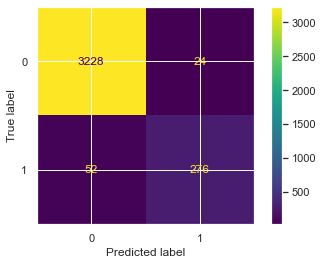

Classification_report for CatBoostClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.92      0.84      0.88       328

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [15]:
# Use CatBoostClassifier model
model_cat = CatBoostClassifier(iterations=10, depth=10, learning_rate=1, loss_function='Logloss',
                              verbose=False)
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
cv_results_cat = cross_val_score(model_cat, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation CatBoostClassifier", cv_results_cat.mean()))
model_cat.fit(X_train,y_train,verbose=False)
y_predcat = model_cat.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_predcat)
print("Accuracy_cat: ", accuracy_cat)
a2 = ( y_predcat > 0.5 ).astype(int)
print("Confusion_matrix for CatBoostClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test, y_predcat)
plt.show()
print("Classification_report for CatBoostClassifier:", 
      classification_report(y_test, a2), sep="\n")

In [16]:
# Use Neural Network model
model_NN = tf.keras.Sequential()
model_NN.add(tf.keras.layers.Dense(8, input_shape = (8,), activation = "relu"))
model_NN.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model_NN.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ["accuracy"])

In [17]:
stp = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0, patience = 10, verbose = 0, mode = "auto")

In [18]:
history = model_NN.fit(X_train, y_train, epochs = 200, validation_split = 0.1, verbose = 0, callbacks = [stp])

In [19]:
std_dict = history.history

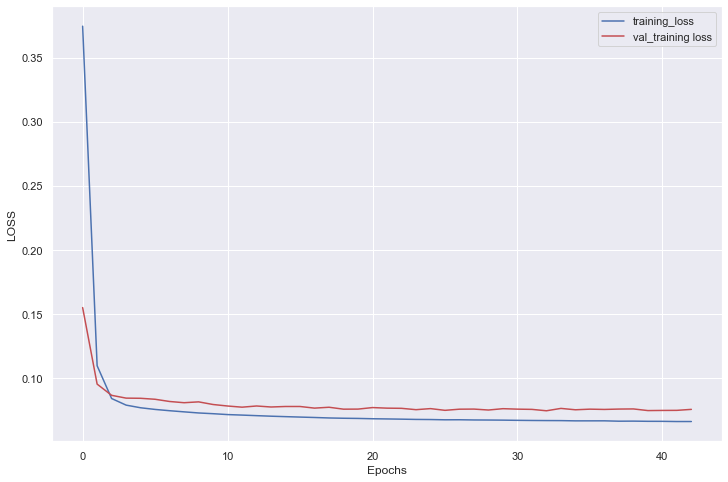

In [20]:
l_v = std_dict["loss"]
val_l_v = std_dict["val_loss"]
plt.figure(figsize = (12, 8))
plt.plot(l_v, "b", label = "training_loss")
plt.plot(val_l_v, "r", label = "val_training loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("LOSS")
pyplot.show()

In [21]:
loss, acc = model_NN.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

112/112 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9791
Test loss:  0.07183238118886948
Test accuracy:  0.9790502786636353


In [22]:
y_pred_NN = model_NN.predict(X_test)

Confusion_matrix for NN:


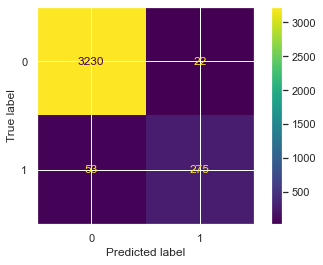

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.84      0.88       328

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [23]:
pred = ( y_pred_NN > 0.5 ).astype(int)
print("Confusion_matrix for NN:")
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()
print(classification_report(y_test, pred))

Evaluation cross validation KNN: 0.977860
Accuracy_KNN:  0.9784916201117319
Confusion_matrix for KNeighborsClassifier:


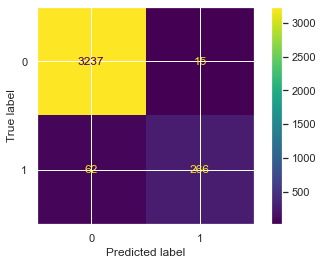

Classification_report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.81      0.87       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [24]:
# Use KNeighborsClassifier model
model_KNN = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_KNN = cross_val_score(model_KNN, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation KNN", cv_results_KNN.mean()))
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
accuracy_KNN = accuracy_score(y_test, y_predKNN)
print("Accuracy_KNN: ", accuracy_KNN)
print("Confusion_matrix for KNeighborsClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test, y_predKNN)
plt.show()
print("Classification_report for KNeighborsClassifier:", 
      sklearn.metrics.classification_report(y_test, y_predKNN), sep="\n")

Evaluation cross validation CART: 0.975066
Accuracy_CART:  0.9751396648044692
Confusion_matrix for KNeighborsClassifier:


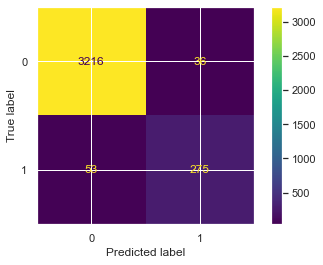

Classification_report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.88      0.84      0.86       328

    accuracy                           0.98      3580
   macro avg       0.93      0.91      0.92      3580
weighted avg       0.97      0.98      0.97      3580



In [25]:
# Use DecisionTreeClassifier model
model_CART = DecisionTreeClassifier(max_depth=10)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results_CART = cross_val_score(model_CART, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('%s: %f' % ("Evaluation cross validation CART", cv_results_CART.mean()))
model_CART.fit(X_train, y_train)
y_predCART = model_CART.predict(X_test)
accuracy_CART = accuracy_score(y_test, y_predCART)
print("Accuracy_CART: ", accuracy_CART)
print("Confusion_matrix for KNeighborsClassifier:")
ConfusionMatrixDisplay.from_predictions(y_test, y_predCART)
plt.show()
print("Classification_report for DecisionTreeClassifier:", 
      sklearn.metrics.classification_report(y_test, y_predCART), sep="\n")